In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل البيانات
df = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv")

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


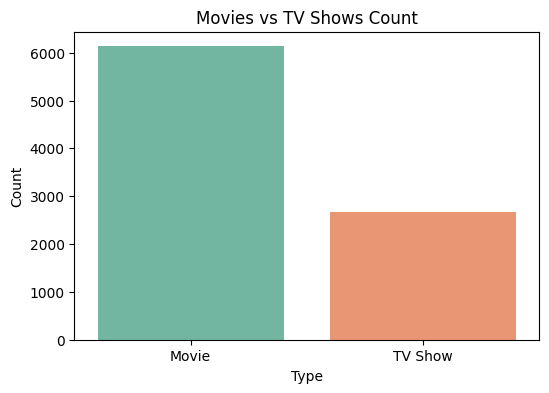

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs TV Shows Count")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


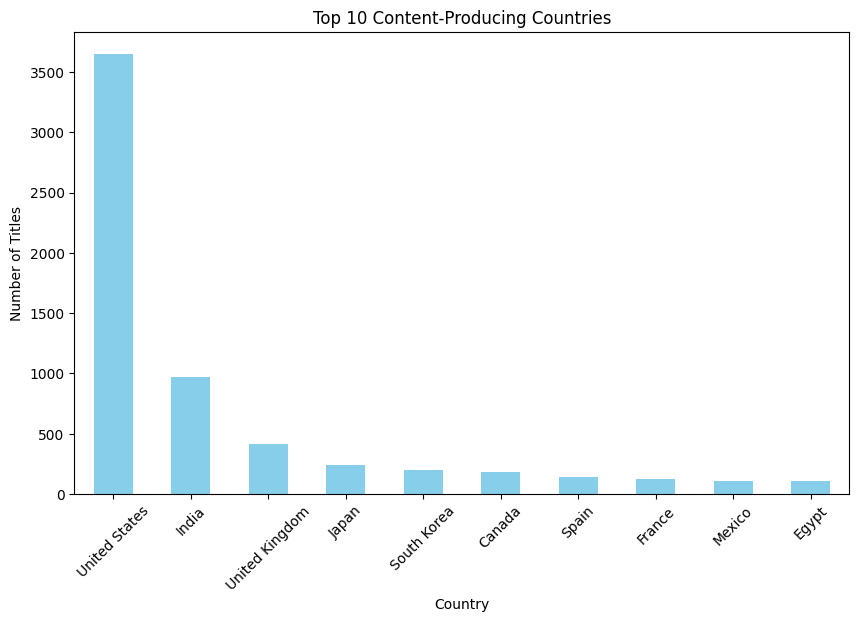

In [8]:
# Analysis of the top 10 content-producing countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

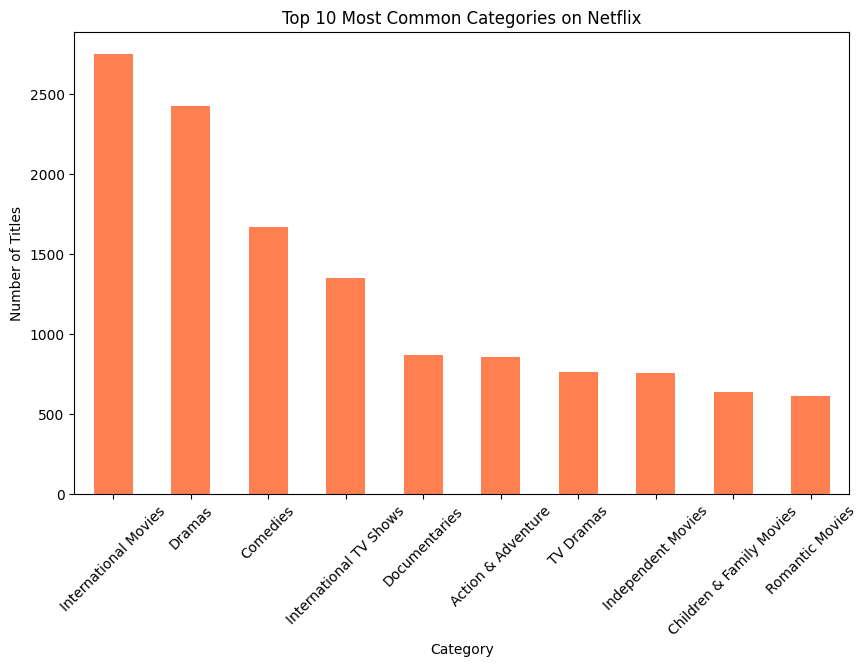

In [9]:

top_categories = df['listed_in'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10,6))
top_categories.plot(kind='bar', color='coral')
plt.title("Top 10 Most Common Categories on Netflix")
plt.xlabel("Category")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


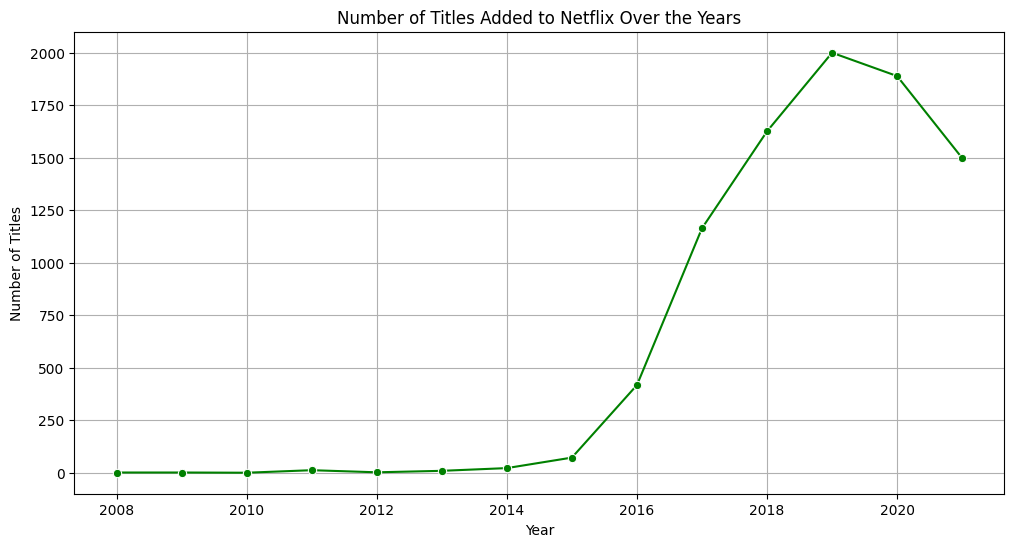

In [10]:
df['year_added'] = df['date_added'].dt.year
df_yearly = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=df_yearly.index, y=df_yearly.values, marker='o', color='green')
plt.title("Number of Titles Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


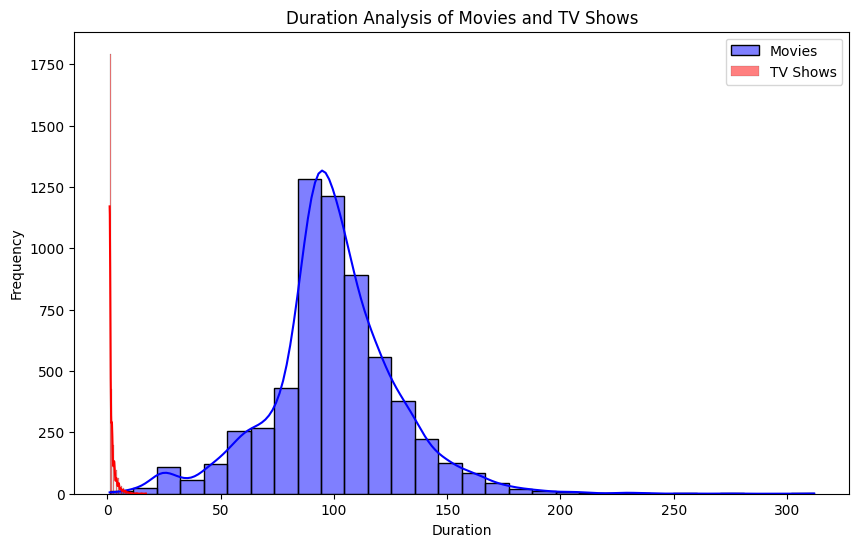

In [11]:
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
movies = df[df['type'] == 'Movie']
shows = df[df['type'] == 'TV Show']
plt.figure(figsize=(10,6))
sns.histplot(movies['duration'].dropna(), bins=30, kde=True, color='blue', label='Movies')
sns.histplot(shows['duration'].dropna(), bins=30, kde=True, color='red', label='TV Shows')
plt.legend()
plt.title("Duration Analysis of Movies and TV Shows")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()


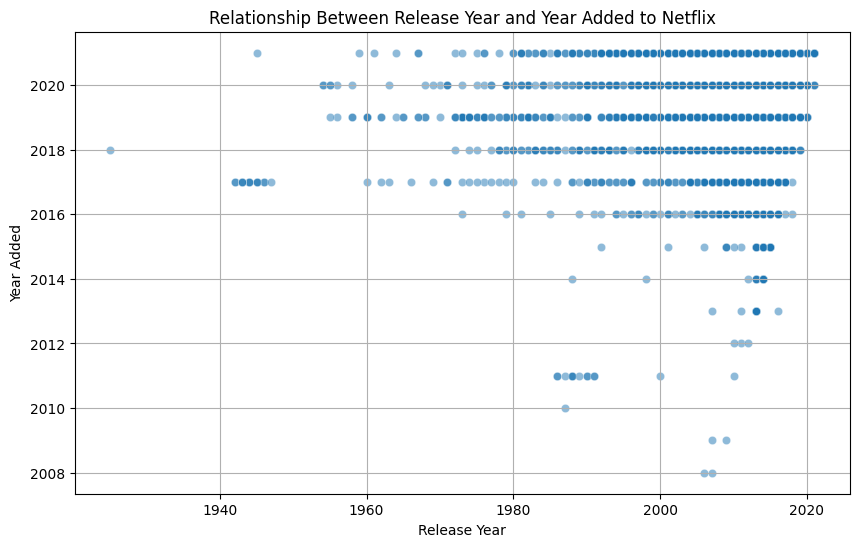

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['release_year'], y=df['year_added'], alpha=0.5)
plt.title("Relationship Between Release Year and Year Added to Netflix")
plt.xlabel("Release Year")
plt.ylabel("Year Added")
plt.grid(True)
plt.show()


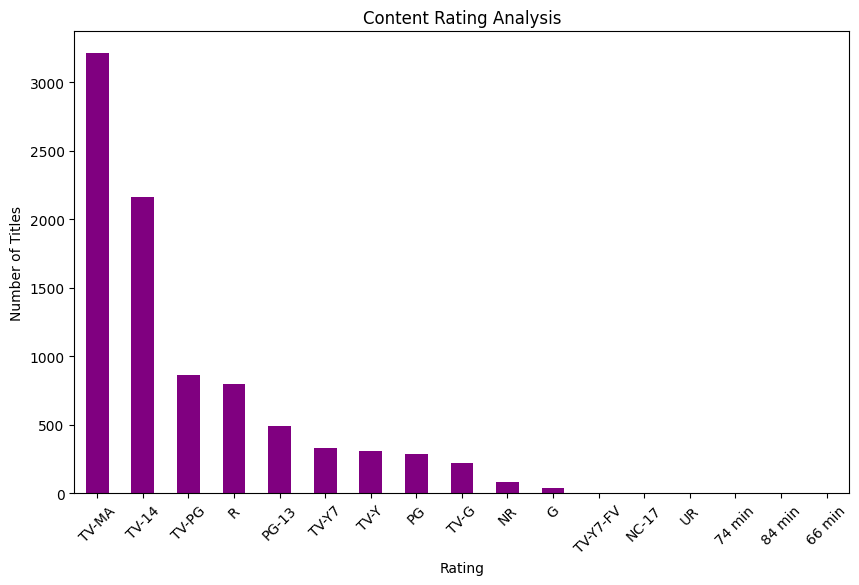

In [13]:
# Content Rating Analysis
df['rating'].value_counts().plot(kind='bar', color='purple', figsize=(10,6))
plt.title("Content Rating Analysis")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

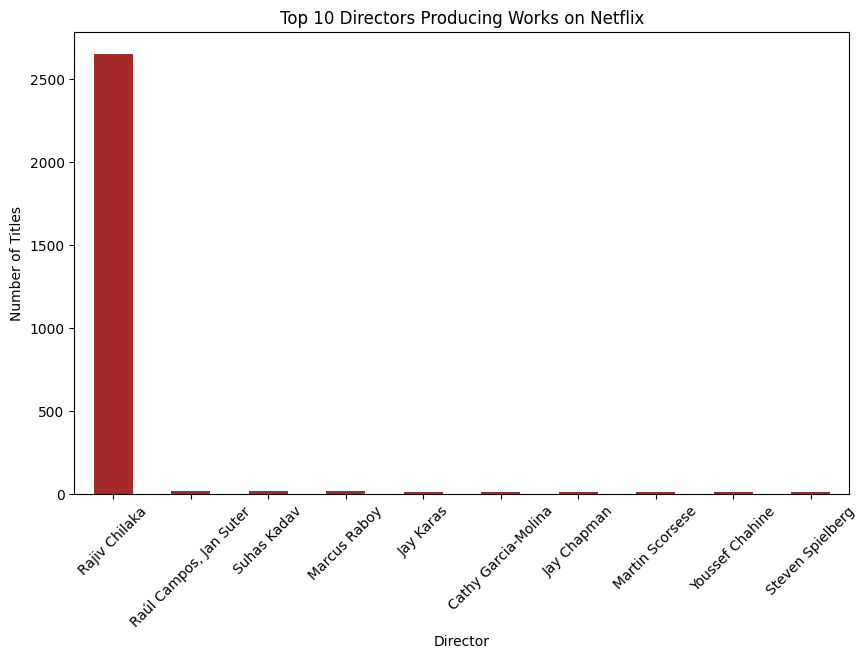

In [14]:
# Directors and Actors Collaborations Analysis
director_counts = df['director'].value_counts().head(10)
plt.figure(figsize=(10,6))
director_counts.plot(kind='bar', color='brown')
plt.title("Top 10 Directors Producing Works on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

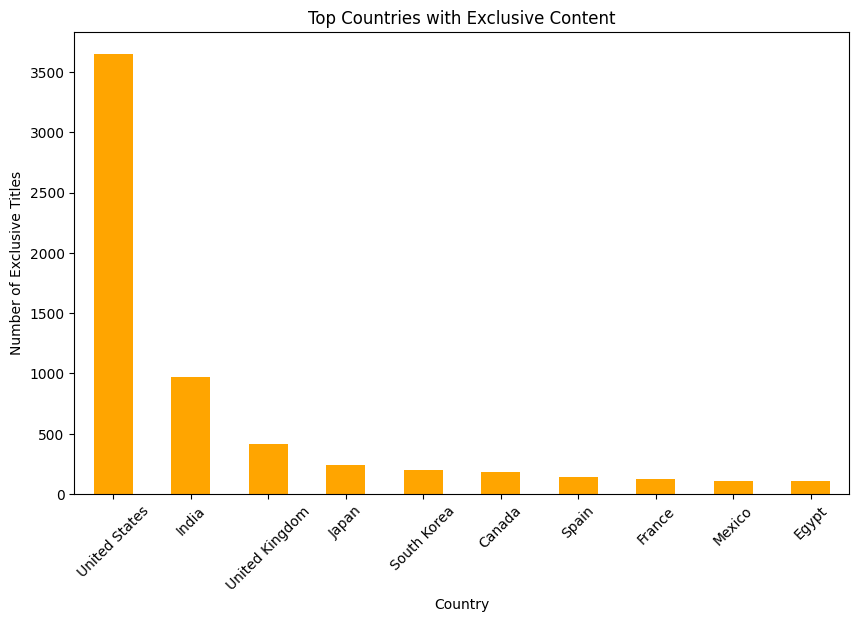

In [15]:
# Exclusive Content by Country Analysis
exclusive_per_country = df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
exclusive_per_country.plot(kind='bar', color='orange')
plt.title("Top Countries with Exclusive Content")
plt.xlabel("Country")
plt.ylabel("Number of Exclusive Titles")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


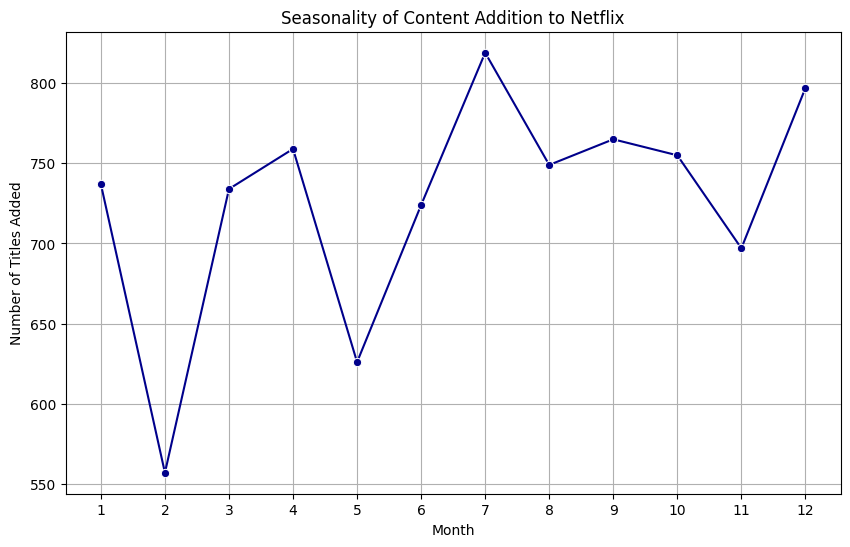

In [16]:
# Seasonality of Content Addition Analysis
df['month_added'] = df['date_added'].dt.month
df_monthly = df['month_added'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=df_monthly.index, y=df_monthly.values, marker='o', color='darkblue')
plt.title("Seasonality of Content Addition to Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,0,0,1975,2295,1699,603,1698,72,7,89,274,2577,13,8
1,1111,1,1091,3392,409,426,1697,73,11,1,414,1762,13,8
2,2222,1,2651,2105,6296,603,1697,73,11,0,242,7341,13,8
3,3333,1,3506,3392,1699,603,1697,73,11,0,297,3617,13,8
4,4444,1,3861,3392,4815,251,1697,73,11,1,393,4416,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,1093,59,8,157,269,895,11,10
8803,8672,1,8773,3392,1699,603,972,70,14,1,424,8483,11,6
8804,8673,0,8774,3631,3231,603,1077,61,8,87,207,5228,11,10
8805,8674,0,8777,3247,7061,603,1140,58,6,87,125,3315,12,0


In [18]:
target=df['type']
df=df.drop('type',axis=1)
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,0,1975,2295,1699,603,1698,72,7,89,274,2577,13,8
1,1111,1091,3392,409,426,1697,73,11,1,414,1762,13,8
2,2222,2651,2105,6296,603,1697,73,11,0,242,7341,13,8
3,3333,3506,3392,1699,603,1697,73,11,0,297,3617,13,8
4,4444,3861,3392,4815,251,1697,73,11,1,393,4416,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,8770,979,4677,603,1093,59,8,157,269,895,11,10
8803,8672,8773,3392,1699,603,972,70,14,1,424,8483,11,6
8804,8673,8774,3631,3231,603,1077,61,8,87,207,5228,11,10
8805,8674,8777,3247,7061,603,1140,58,6,87,125,3315,12,0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=scaler.fit_transform(df)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.2,random_state=0,shuffle=True,stratify=target)

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "MLP": MLPClassifier()
}

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)

    print(f"\n{name} Classifier Report")
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))


SVM Classifier Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1227
           1       0.99      1.00      0.99       535

    accuracy                           1.00      1762
   macro avg       0.99      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762

[[1220    7]
 [   0  535]]

Random Forest Classifier Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00       535

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762

[[1225    2]
 [   0  535]]

Gradient Boosting Classifier Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00       535

    accuracy                       